# Task
Crear, entrenar y evaluar una red neuronal simple, incluyendo la preparación de datos, la definición y compilación del modelo, el entrenamiento, la visualización del proceso de entrenamiento y la evaluación del modelo, para luego resumir los resultados clave.

## Preparar los datos

### Subtask:
Generar o cargar un conjunto de datos simple para la clasificación o regresión, dividiéndolo en conjuntos de entrenamiento y prueba.


**Reasoning**:
First, I will generate a synthetic classification dataset using `make_classification` with the specified parameters. Then, I will split this dataset into training and testing sets using `train_test_split`, ensuring an 80/20 split and reproducibility with a `random_state`.



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset for classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
print("Generated dataset shape (X, y):")
print(f"X: {X.shape}, y: {y.shape}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDataset split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

## Definir el modelo de red neuronal

### Subtask:
Construir una red neuronal simple utilizando la API Sequential de Keras, definiendo capas (por ejemplo, Dense) y funciones de activación.


**Reasoning**:
To construct the neural network model, I will import the necessary Keras components, define a Sequential model with an input layer, a hidden layer, and an output layer suitable for binary classification, and then display its summary to verify the architecture.



In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Create a Sequential model instance.
model = Sequential()

# 3. Add an input Dense layer
# input_shape should be the number of features in X_train
input_dim = X_train.shape[1]
model.add(Dense(units=32, activation='relu', input_shape=(input_dim,)))

# 4. Add one or more additional Dense layers for hidden layers
model.add(Dense(units=16, activation='relu'))

# 5. Add a final Dense layer for the output (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# 6. Print the model summary to review its architecture.
print("Model Summary:")
model.summary()

NameError: name 'X_train' is not defined

**Reasoning**:
The previous code failed because `X_train` was not defined as the data preparation step in the preceding cell was not executed. To fix this, I will include the data generation and splitting code in the current cell to ensure `X_train` is available before defining the model.



In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Re-generate the synthetic dataset and split it into training and testing sets
# This ensures X_train is defined if the previous cell was not executed
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create a Sequential model instance.
model = Sequential()

# 3. Add an input Dense layer
# input_shape should be the number of features in X_train
input_dim = X_train.shape[1]
model.add(Dense(units=32, activation='relu', input_shape=(input_dim,)))

# 4. Add one or more additional Dense layers for hidden layers
model.add(Dense(units=16, activation='relu'))

# 5. Add a final Dense layer for the output (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# 6. Print the model summary to review its architecture.
print("Model Summary:")
model.summary()

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Now that the model architecture is defined, the next step is to compile it. I will use the Adam optimizer, binary cross-entropy as the loss function (suitable for binary classification), and accuracy as the metric to monitor during training.



In [3]:
from tensorflow.keras.optimizers import Adam

# 1. Compile the model
# For binary classification:
#   - Optimizer: Adam is a good general-purpose optimizer.
#   - Loss function: 'binary_crossentropy' is standard for binary classification.
#   - Metrics: 'accuracy' to easily interpret performance.
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

print("Model compiled successfully with Adam optimizer, binary_crossentropy loss, and accuracy metric.")

Model compiled successfully with Adam optimizer, binary_crossentropy loss, and accuracy metric.


## Entrenar el modelo

### Subtask:
Entrenar el modelo de red neuronal utilizando los datos de entrenamiento y validarlo con los datos de prueba.

#### Instructions:
1. Entrenar el modelo utilizando los datos de entrenamiento (`X_train`, `y_train`).
2. Especificar el número de épocas y el tamaño del lote (`batch_size`).
3. Utilizar los datos de prueba (`X_test`, `y_test`) para la validación durante el entrenamiento, pasando `validation_data` al método `fit()`.
4. Almacenar el historial de entrenamiento para su posterior visualización.


## Entrenar el modelo

### Subtask:
Entrenar el modelo de red neuronal utilizando los datos de entrenamiento y validarlo con los datos de prueba.

#### Instructions:
1. Entrenar el modelo utilizando los datos de entrenamiento (`X_train`, `y_train`).
2. Especificar el número de épocas y el tamaño del lote (`batch_size`).
3. Utilizar los datos de prueba (`X_test`, `y_test`) para la validación durante el entrenamiento, pasando `validation_data` al método `fit()`.
4. Almacenar el historial de entrenamiento para su posterior visualización.


**Reasoning**:
I will train the neural network model using `model.fit()`, providing the training data (`X_train`, `y_train`), validation data (`X_test`, `y_test`), number of epochs, and batch size. The training history will be stored in a variable for later use.



In [4]:
history = model.fit(
    X_train, y_train,
    epochs=10,        # Number of times to iterate over the entire dataset
    batch_size=32,    # Number of samples per gradient update
    validation_data=(X_test, y_test), # Data for validation
    verbose=1         # Show progress bar during training
)

print("Model training completed.")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5067 - loss: 0.7299 - val_accuracy: 0.5200 - val_loss: 0.6937
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6081 - loss: 0.6413 - val_accuracy: 0.6300 - val_loss: 0.6158
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6959 - loss: 0.5772 - val_accuracy: 0.7250 - val_loss: 0.5533
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7983 - loss: 0.5095 - val_accuracy: 0.7850 - val_loss: 0.4901
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8339 - loss: 0.4534 - val_accuracy: 0.7950 - val_loss: 0.4375
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8786 - loss: 0.3785 - val_accuracy: 0.8050 - val_loss: 0.4000
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8695 - loss: 0.3566 - val_accuracy: 0.8200 - val_loss: 0.3717
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8645 - loss: 0.3375 - val_accuracy: 0.8300 - val_loss

## Visualizar el proceso de entrenamiento

### Subtask:
Visualizar la pérdida y la precisión del entrenamiento y la validación a lo largo de las épocas.

#### Instructions:
1. Extraer los valores de `loss`, `accuracy`, `val_loss`, y `val_accuracy` del objeto `history`.
2. Utilizar `matplotlib.pyplot` para crear dos gráficos:
    - Un gráfico que muestre la pérdida de entrenamiento y validación por época.
    - Otro gráfico que muestre la precisión de entrenamiento y validación por época.
3. Asegurarse de que ambos gráficos tengan etiquetas de ejes, un título y una leyenda.

## Visualizar el proceso de entrenamiento

### Subtask:
Visualizar la p\u00e9rdida y la precisi\u00f3n del entrenamiento y la validaci\u00f3n a lo largo de las \u00e9pocas.

#### Instructions:
1. Extraer los valores de `loss`, `accuracy`, `val_loss`, y `val_accuracy` del objeto `history`.
2. Utilizar `matplotlib.pyplot` para crear dos gr\u00e1ficos:
    - Un gr\u00e1fico que muestre la p\u00e9rdida de entrenamiento y validaci\u00f3n por \u00e9poca.
    - Otro gr\u00e1fico que muestre la precisi\u00f3n de entrenamiento y validaci\u00f3n por \u00e9poca.
3. Asegurarse de que ambos gr\u00e1ficos tengan etiquetas de ejes, un t\u00edtulo y una leyenda.

**Reasoning**:
To visualize the training history, I will first extract the loss and accuracy metrics for both training and validation from the 'history' object and then plot them using `matplotlib.pyplot` to show the model's performance over epochs.



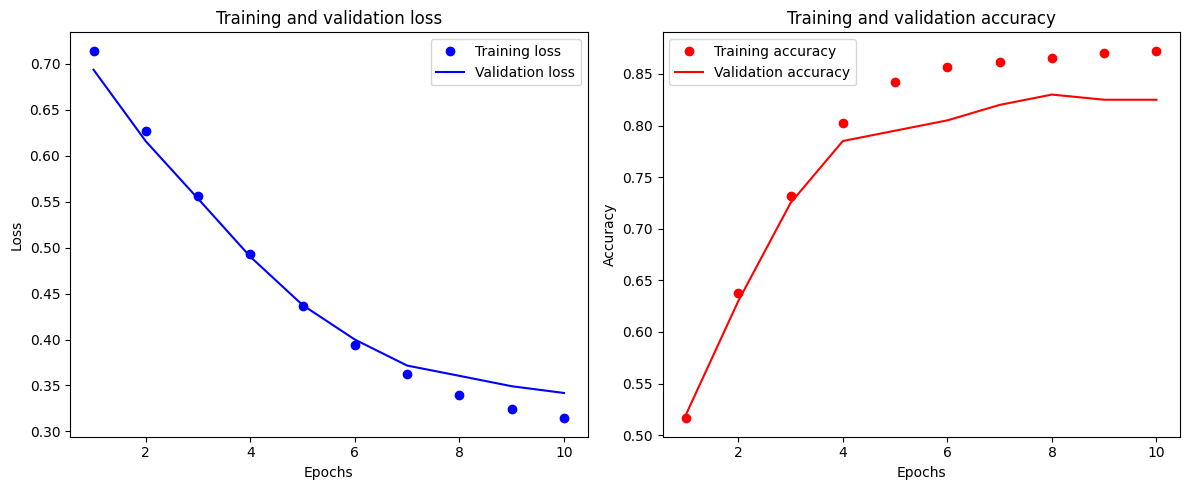

Plots showing training and validation loss and accuracy over epochs.


In [5]:
import matplotlib.pyplot as plt

# 1. Extraer los valores de loss, accuracy, val_loss, y val_accuracy del objeto history.
hist_dict = history.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict['val_loss']
accuracy_values = hist_dict['accuracy']
val_accuracy_values = hist_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# 2. Utilizar matplotlib.pyplot para crear dos gráficos:
#    - Un gráfico que muestre la pérdida de entrenamiento y validación por época.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#    - Otro gráfico que muestre la precisión de entrenamiento y validación por época.
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(epochs, accuracy_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print("Plots showing training and validation loss and accuracy over epochs.")

## Evaluar el modelo

### Subtask:
Evaluar el rendimiento del modelo en el conjunto de datos de prueba, mostrando la pérdida y la precisión finales.


**Reasoning**:
I will use the `evaluate()` method to assess the model's performance on the test data, capturing the loss and accuracy, and then display these metrics to the user.



In [6]:
print("\nEvaluating model on test data...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print("Model evaluation completed.")


Evaluating model on test data...
Test Loss: 0.3418
Test Accuracy: 0.8250
Model evaluation completed.


## Final Task

### Subtask:
Resumir el proceso de creación, entrenamiento y evaluación de la red neuronal simple, destacando los resultados clave.


## Summary:

### Data Analysis Key Findings

*   A synthetic binary classification dataset of 1,000 samples with 20 features (2 informative, 0 redundant) was successfully generated and split into training (800 samples) and testing (200 samples) sets.
*   A simple Keras Sequential neural network was constructed with an input layer (32 units, ReLU), a hidden layer (16 units, ReLU), and an output layer (1 unit, Sigmoid) for binary classification, totaling 1,217 trainable parameters.
*   The model was compiled using the Adam optimizer, 'binary\_crossentropy' as the loss function, and 'accuracy' as the evaluation metric.
*   The model was trained for 10 epochs with a batch size of 32. During training, both training loss and validation loss generally decreased, while training accuracy and validation accuracy generally increased, indicating effective learning.
*   Visualizations confirmed the training progress, showing trends of decreasing loss and increasing accuracy for both training and validation sets over the epochs.
*   Upon evaluation on the test data, the model achieved a **Test Loss of 0.3418** and a **Test Accuracy of 0.8250**, suggesting reasonable performance on unseen data.

### Insights or Next Steps

*   The model demonstrates a solid baseline performance (82.5% accuracy) on the synthetic dataset. Future efforts could focus on hyperparameter tuning (e.g., learning rate, number of epochs, batch size, number of units per layer) to potentially improve performance further or prevent potential overfitting observed in the training curves.
*   Given the simplicity of the model and dataset, analyzing the impact of adding more complex layers (e.g., dropout layers to combat overfitting) or different activation functions could provide insights into model robustness and generalization capabilities.
